<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Etallonage-de-la-relation-linéaire-$f(\sigma)=[NaCl]$" data-toc-modified-id="Etallonage-de-la-relation-linéaire-$f(\sigma)=[NaCl]$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Etallonage de la relation linéaire $f(\sigma)=[NaCl]$</a></span></li><li><span><a href="#Données-mesure-12-03" data-toc-modified-id="Données-mesure-12-03-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Données mesure 12-03</a></span></li><li><span><a href="#Debits-à-partir-de-la-masse" data-toc-modified-id="Debits-à-partir-de-la-masse-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Debits à partir de la masse</a></span></li><li><span><a href="#Etalonnage-24-03" data-toc-modified-id="Etalonnage-24-03-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Etalonnage 24-03</a></span></li><li><span><a href="#Mesure-24-03" data-toc-modified-id="Mesure-24-03-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mesure 24-03</a></span></li><li><span><a href="#Mesure-24-04" data-toc-modified-id="Mesure-24-04-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mesure 24-04</a></span></li><li><span><a href="#Courbe-de-tarage" data-toc-modified-id="Courbe-de-tarage-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Courbe de tarage</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
size = 25
params = {'legend.fontsize': 'large',
          'figure.figsize': (25, 25),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

M_i=3420 #g masse de sel injecté
C_i=283 #uS/cm Conductivité de référence
Q_SLP=[]
Q_SLP.append(1.5)
Q=[]
Q_res=[]
plt.rcParams.update(params)

## Etallonage de la relation linéaire $f(\sigma)=[NaCl]$

In [2]:
V_e=0.5 #l
M_sel1=np.array([1,0.2,0.2,0.2]) #g
M_sel2=np.array([2,0.4,0.6,0.8]) #g
NaCl1=M_sel1/V_e #g/l
NaCl2=M_sel2/V_e #g/l
sigma0=np.array([354,330,330,330])
sigma1=np.array([4120,1139,1139,1139])
sigma2=np.array([8020,1936,2730,3500])

a=(NaCl2-NaCl1)/(sigma2-sigma1)
a_m=np.median(a)
a_m

0.0005055438110016876

## Données mesure 12-03

In [3]:
grand_logis=np.loadtxt('DébitGuiersMort_1203.txt')[:20]
grand_logis[grand_logis<250]=np.nan
time_gl=np.linspace(0,len(grand_logis)*20,len(grand_logis))


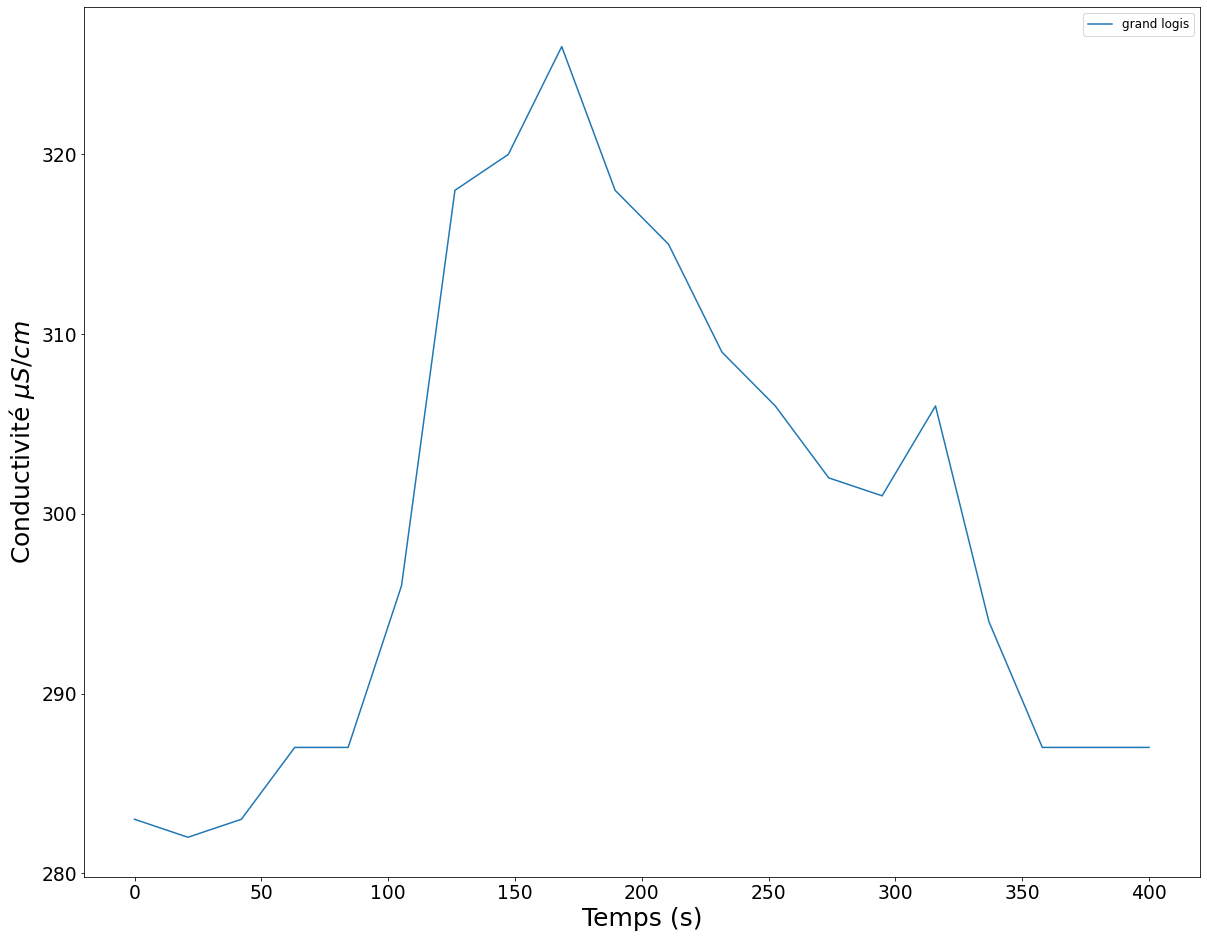

In [4]:
plt.figure(figsize=[20,16])
plt.plot(time_gl,grand_logis,label='grand logis')
plt.xlabel('Temps (s)')
plt.ylabel(r"Conductivité $\mu S/cm$")
plt.legend()
# plt.savefig('12-03-22conductivité.pdf')

## Debits à partir de la masse

In [5]:
Delta_cm_gl=np.nanmean(grand_logis)-C_i
NaCl_gl=Delta_cm_gl*a_m*10**3
Q1=M_i/(NaCl_gl*time_gl[-1])
Q1
Q.append(Q1)

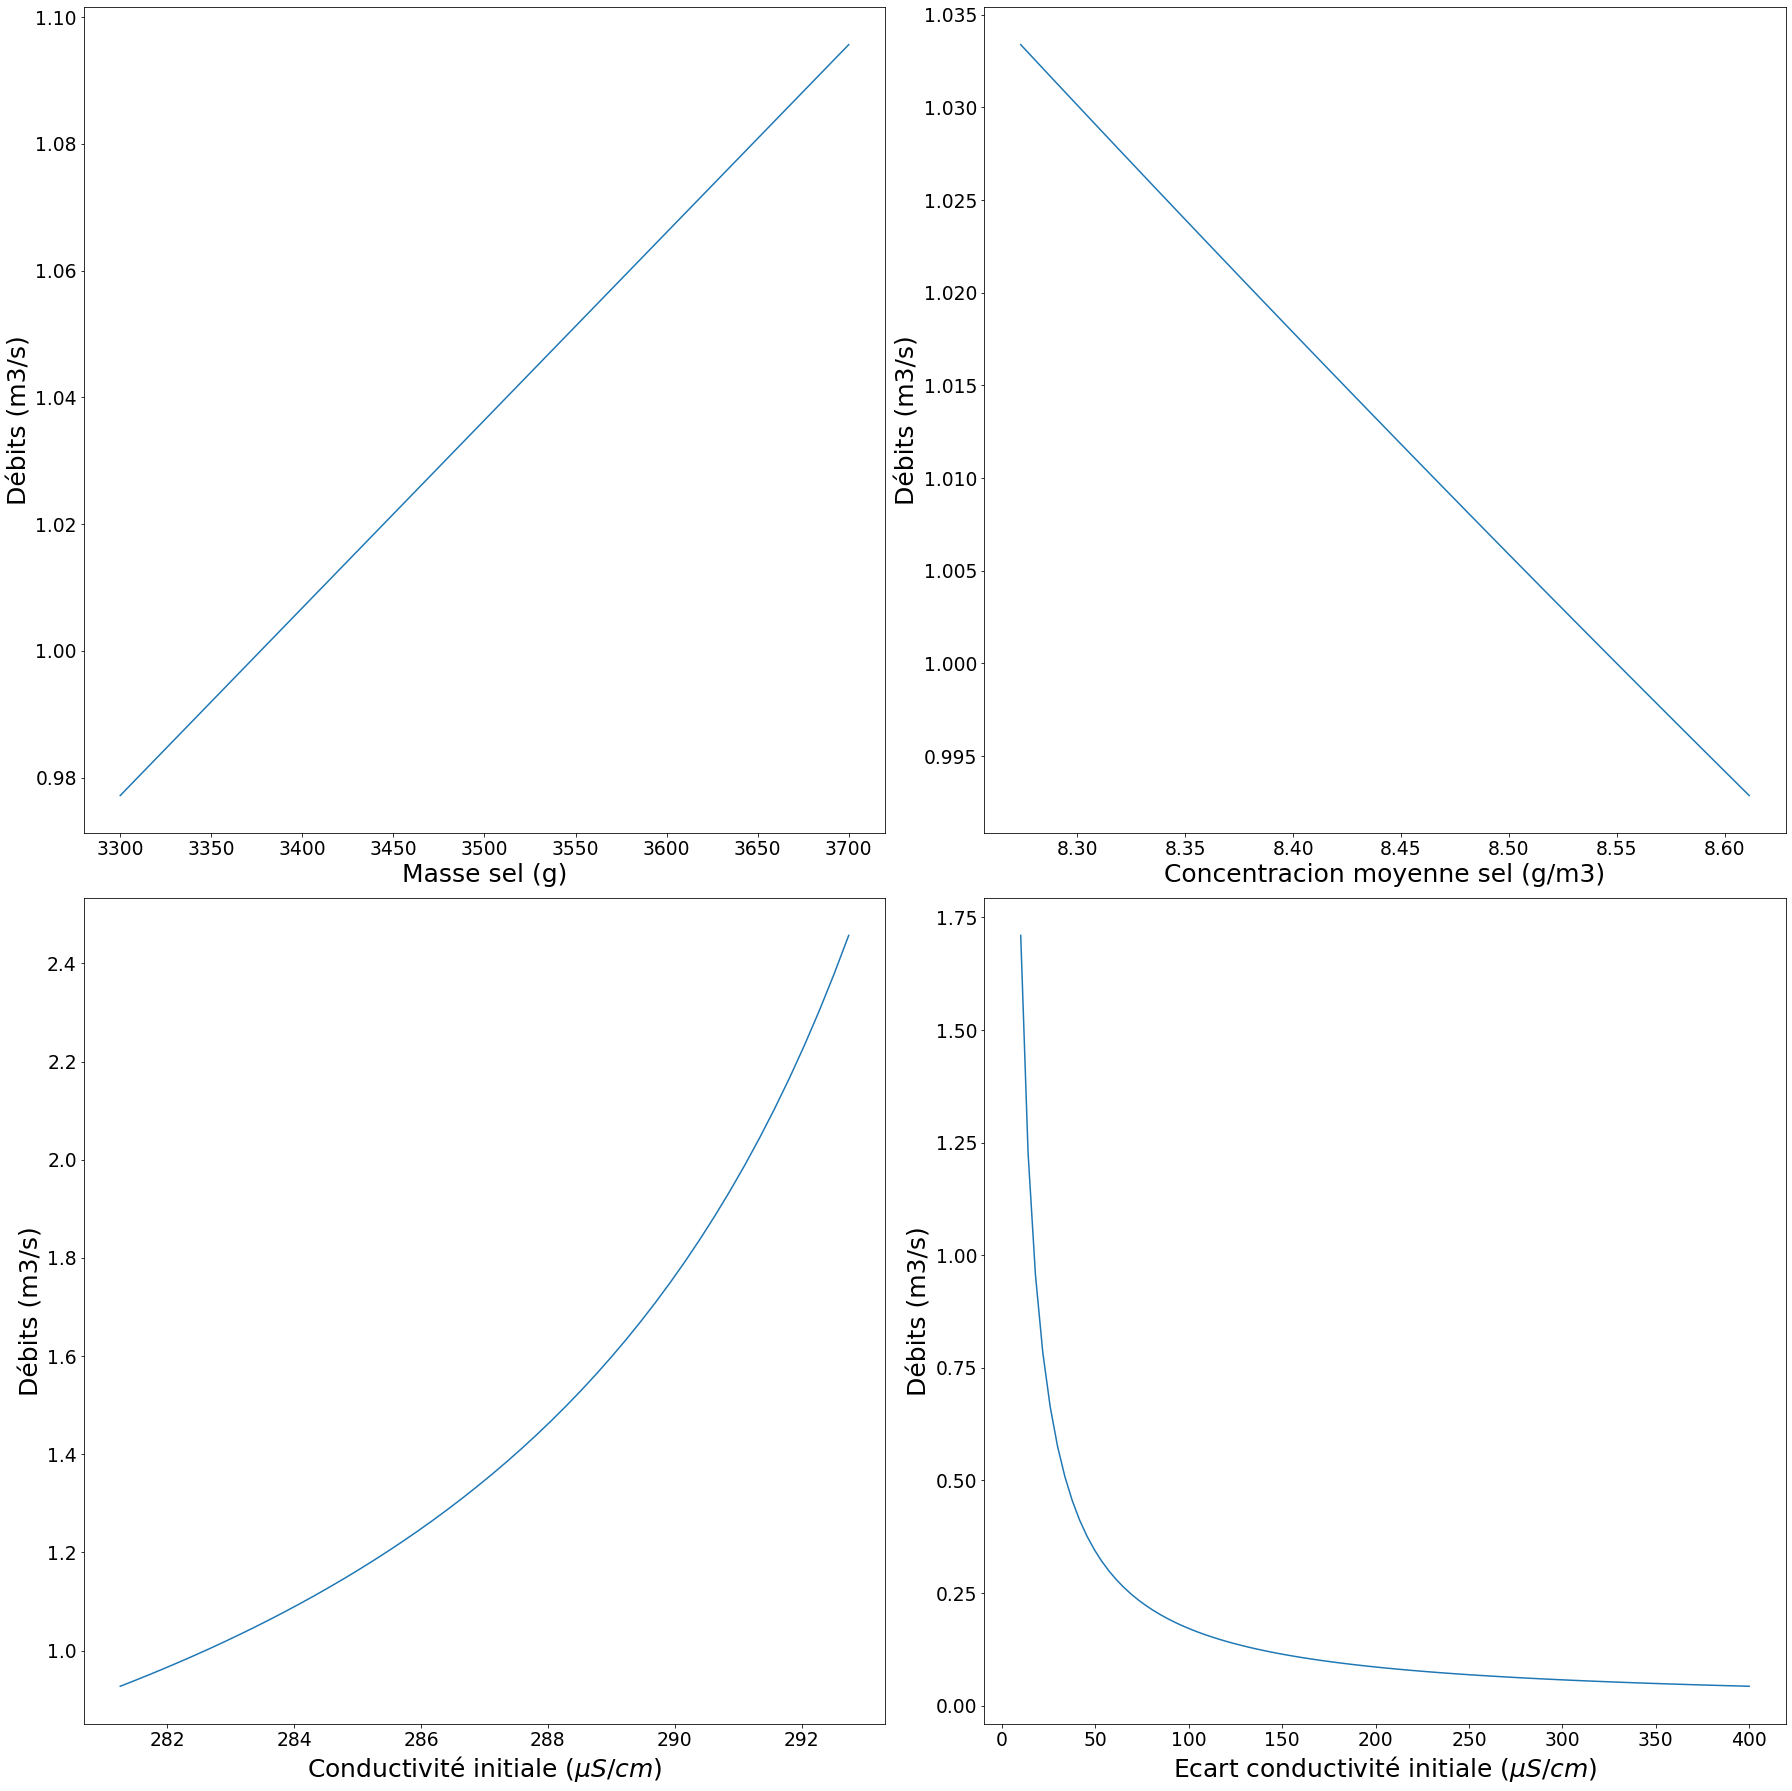

In [6]:
M_test=np.linspace(3300,3700,20)
NaCl_test=np.linspace(NaCl_gl*0.98,NaCl_gl*1.02,100)
C_test=np.linspace(grand_logis[-1]*0.98,grand_logis[-1]*1.02,50)
deltaC=np.linspace(10,400,100)

ax1=plt.subplot(221)
Q1=M_test/(NaCl_gl*time_gl[-1])
ax1.plot(M_test,Q1)
ax1.set_xlabel('Masse sel (g)')
ax1.set_ylabel('Débits (m3/s)')

ax2=plt.subplot(222)
Q2=M_i/(NaCl_test*time_gl[-1])
ax2.plot(NaCl_test,Q2)
ax2.set_xlabel('Concentracion moyenne sel (g/m3)')
ax2.set_ylabel('Débits (m3/s)')

ax3=plt.subplot(223)
Delta_cm_test3=np.nanmean(grand_logis)-C_test
NaCl_test3=Delta_cm_test3/2
Q3=M_i/(NaCl_test3*time_gl[-1])
ax3.plot(C_test,Q3)
ax3.set_xlabel(r'Conductivité initiale ($\mu S/cm$)')
ax3.set_ylabel('Débits (m3/s)')

ax4=plt.subplot(224)
NaCl_test4=deltaC/2
Q4=M_i/(NaCl_test4*time_gl[-1])
ax4.plot(deltaC,Q4)
ax4.set_xlabel(r'Ecart conductivité initiale ($\mu S/cm$)')
ax4.set_ylabel('Débits (m3/s)')


plt.tight_layout()
plt.savefig('sensibilité_masse.pdf')

## Etalonnage 24-03

In [7]:
a=1/1603 #uS/cm pour 1kg Sel/m3



## Mesure 24-03

In [8]:
S_GAM=333 #Guiers Amont
S_GAV=319 #Guiers aval
S_Reg=254#Résurgence

T_GAM=5.8 
T_GAV=6.0
T_Reg=7.3

M_i=7580#g
C_i=333#uS/cm
Q_SLP.append(3)
h=48#cm
dt=1 #s

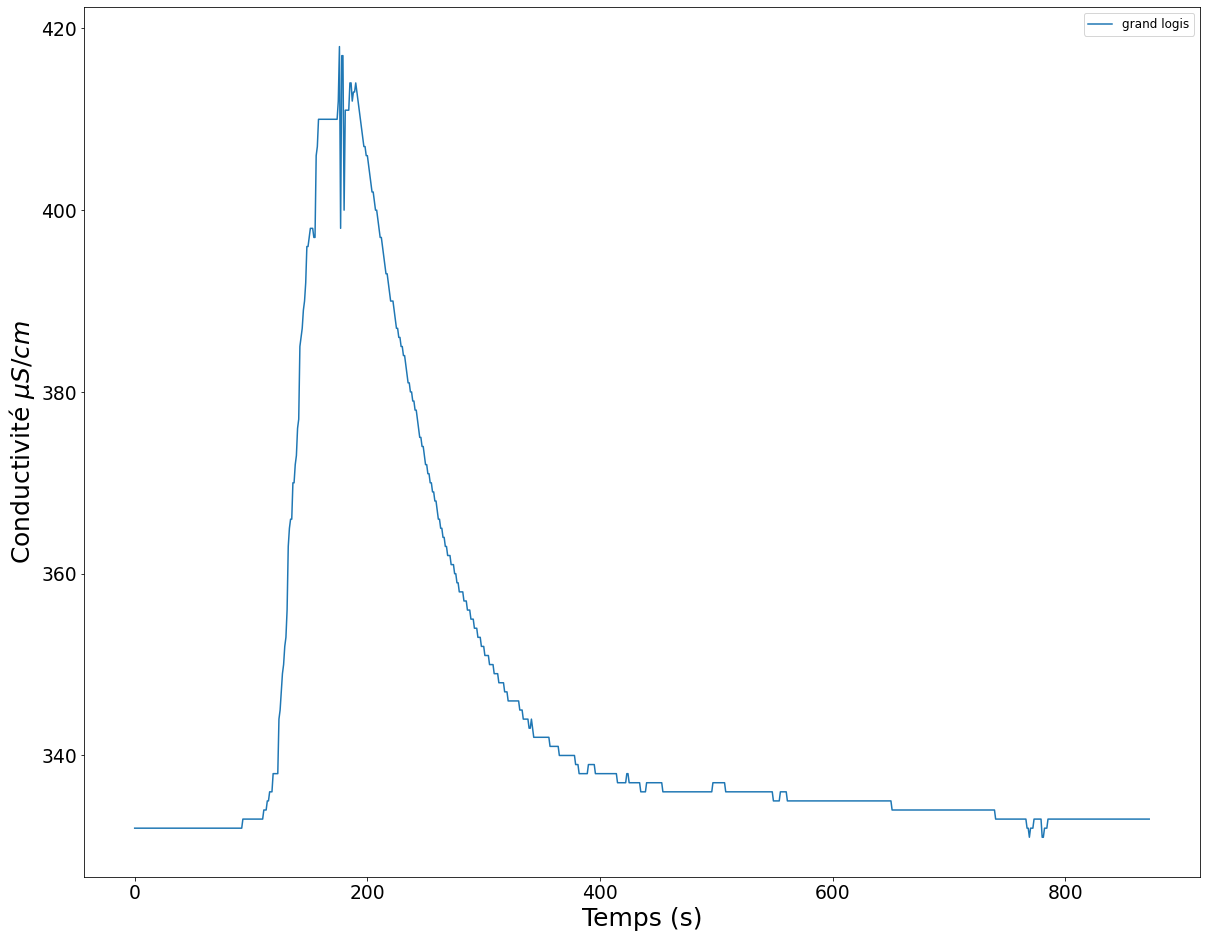

In [9]:
import pandas as pd
GL=pd.read_csv('DébitGuiersMort_2403.csv')
plt.figure(figsize=[20,16])
plt.plot(GL['t'],GL['s'],label='grand logis')
plt.xlabel('Temps (s)')
plt.ylabel(r"Conductivité $\mu S/cm$")
plt.legend()
plt.savefig('conductivité24-03.pdf')

In [10]:
Delta_cm_gl=np.nanmean(GL['s'])-C_i
NaCl_gl1=Delta_cm_gl*a*10**3
Q2=M_i/(NaCl_gl1*np.max(GL['t']))
Q2

1.1390144508298128

In [11]:
Delta_cm=GL['s']-C_i
NaCl=Delta_cm*a
M=np.sum(NaCl*dt)
Q2=M_i*10**-3/M
Q2

1.1377097378277155

In [12]:
Q.append(Q2)

In [13]:
# Débits resurgence
qq=Q2*(S_GAM-S_GAV)/(S_GAV-S_Reg)
print(qq)
Q_res.append(qq)


0.24504517430135409


## Mesure 24-04

In [14]:
S_GAM=282 #Guiers Amont
S_GAV=276 #Guiers aval
S_Reg=240 #Résurgence

T_GAM=6.9 
T_GAV=6.88
T_Reg=7.32

M_i=5000#g
C_i=280#uS/cm
Q_SLP.append(4.5)
# h=48#cm
dt=10#s

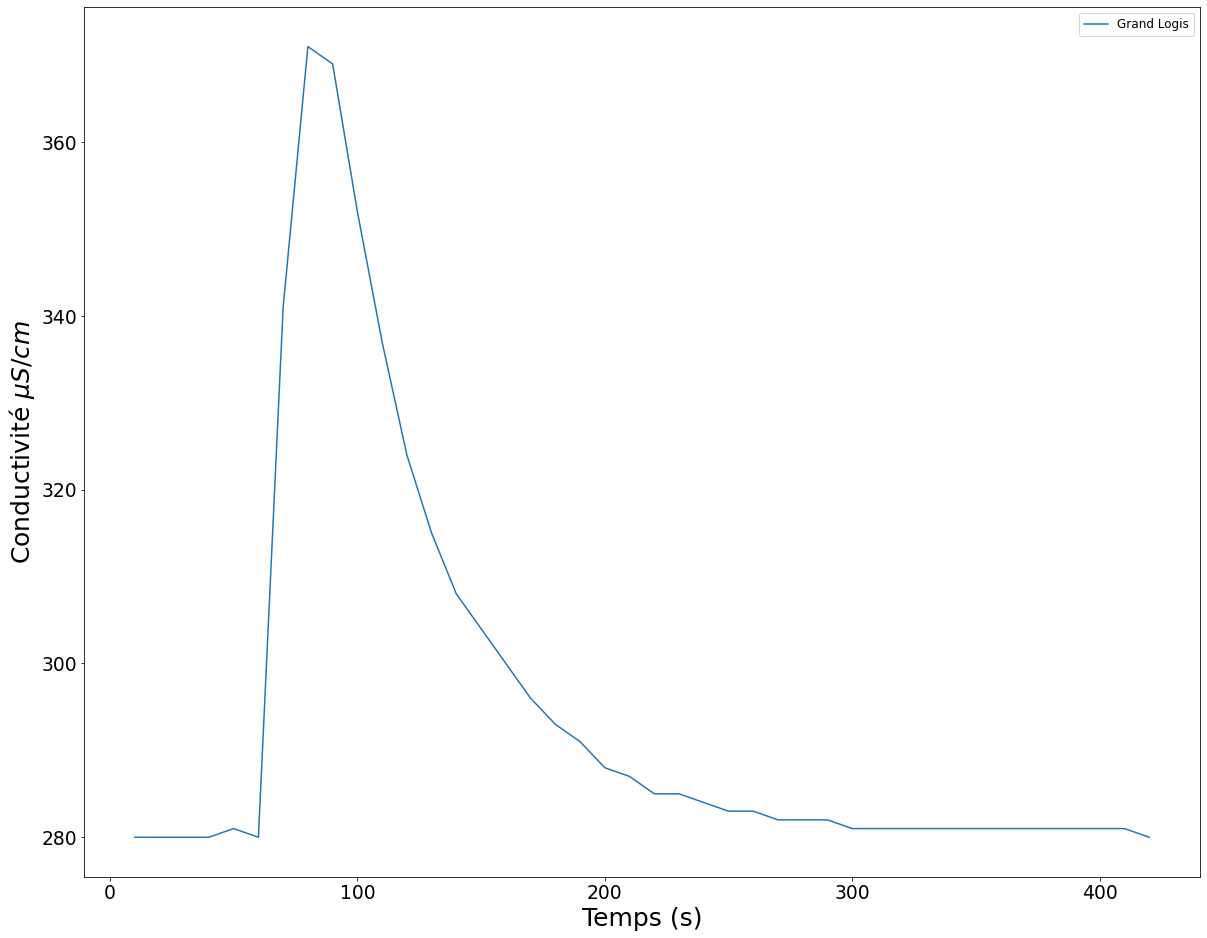

In [24]:
import pandas as pd
GL=pd.read_csv('DébitGuiersMort_2304.csv',header=0,names=['t','s'],skiprows=10,usecols=[0,1])
plt.figure(figsize=[20,16])
plt.plot(GL['t'],GL['s'],label='Grand Logis')
plt.xlabel('Temps (s)')
plt.ylabel(r"Conductivité $\mu S/cm$")
plt.legend()
plt.savefig('conductivité24-04.pdf')

In [16]:
Delta_cm_gl=np.nanmean(GL['s'])-C_i
NaCl_gl=Delta_cm_gl*a*10**3
Q2=M_i/(NaCl_gl1*np.max(GL['t']))
Q2

1.5599016853932604

In [17]:
Delta_cm=GL['s']-C_i
NaCl=Delta_cm*a
M=np.sum(NaCl*dt)*10**3
print(M_i,M)
Q2=M_i/M
Q2

5000 3836.556456643793


1.3032520325203252

In [18]:
Q.append(Q2)

In [19]:
# Débits resurgence
qq=Q2*(S_GAM-S_GAV)/(S_GAV-S_Reg)
print(qq)
Q_res.append(qq)


0.21720867208672087


In [20]:
print(Q_SLP,Q,Q_res)

[1.5, 3, 4.5] [1.0127234015381568, 1.1377097378277155, 1.3032520325203252] [0.24504517430135409, 0.21720867208672087]


## Courbe de tarage

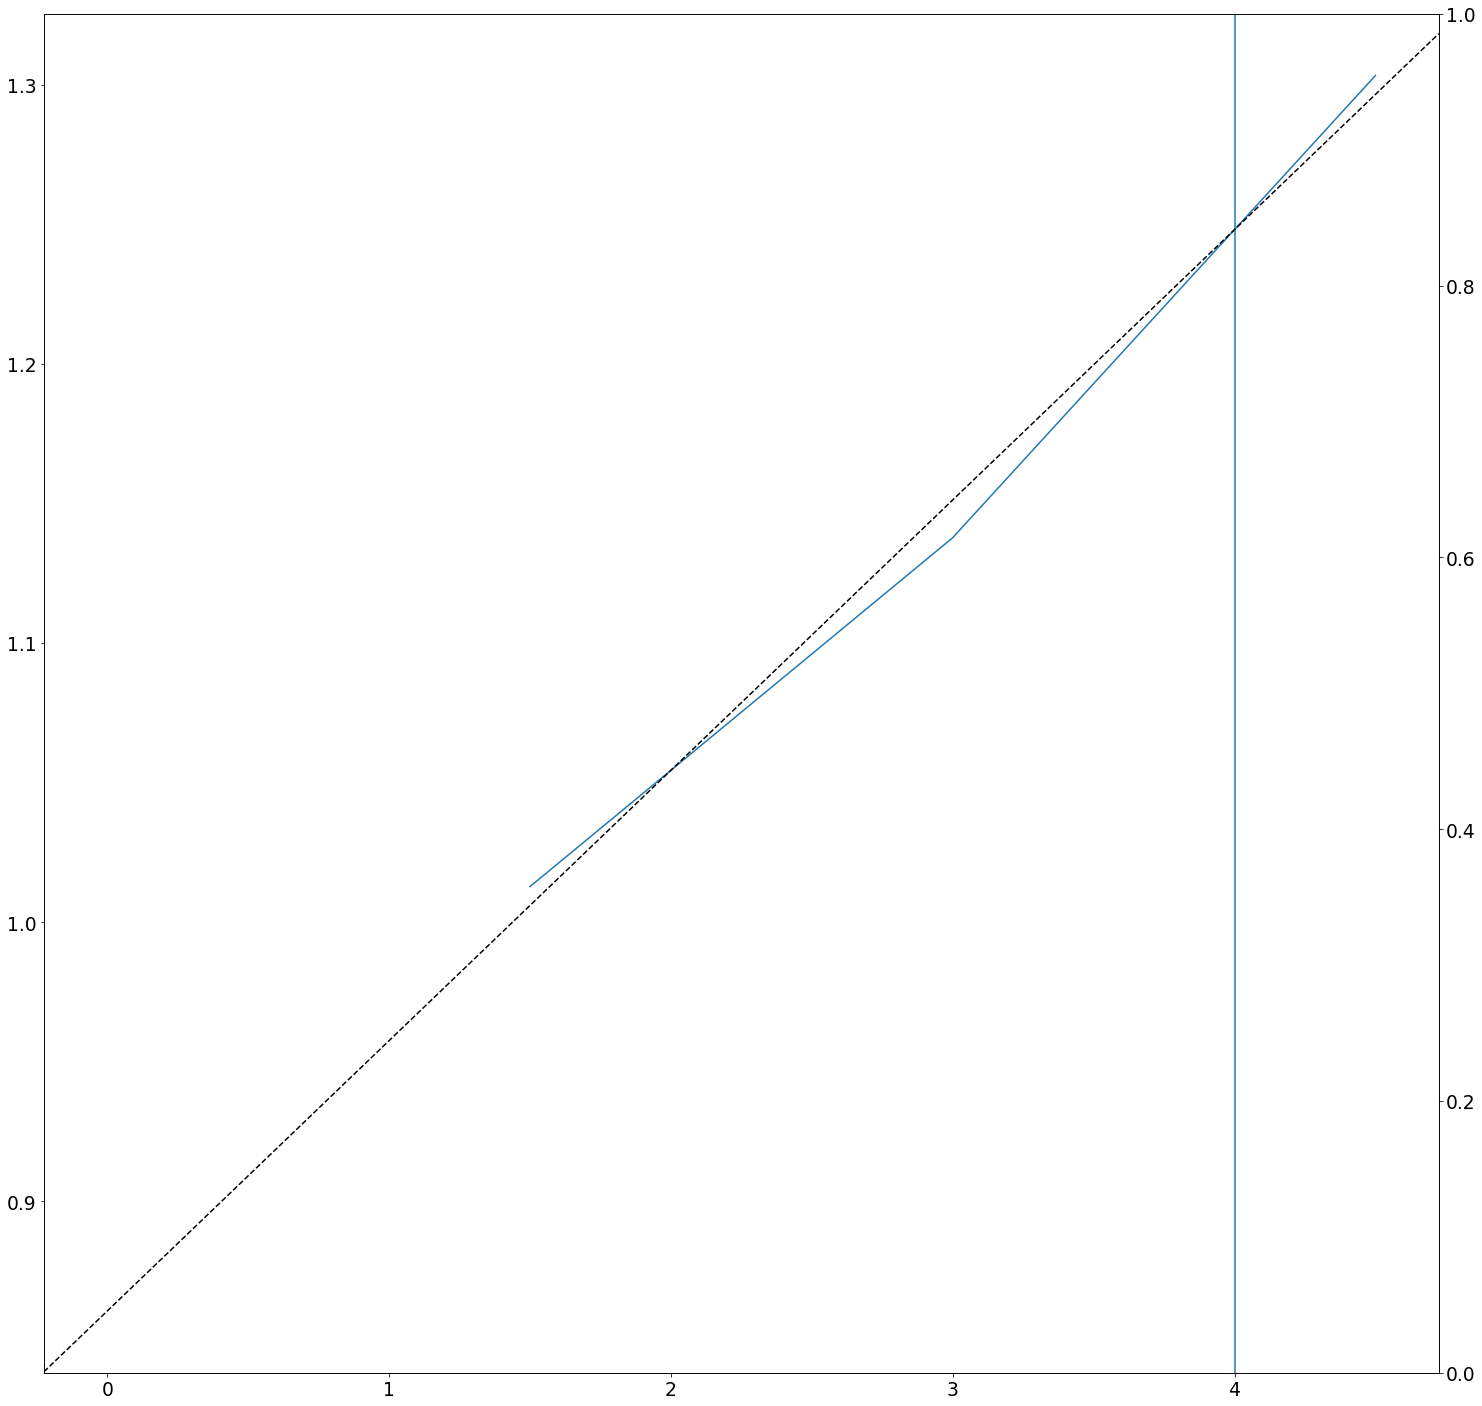

In [21]:
from scipy.stats import linregress
plt.figure()
ax=plt.gca()
ax1=ax.twinx()
ax.plot(Q_SLP,Q)
# ax1.plot(Q_SLP[1:],Q_res)
ax.axvline(x=4)



reg = linregress(Q_SLP[:], Q[:])
ax.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")
# ax.set_xlim([0,35])
# ax.set_ylim([0,10])


In [22]:
# Pente de la courbe, determine la relation lineaire 
# entre le débit à Saint Laurent du Pont et au Pont du Grand Logis
reg.slope

0.09684287699405614

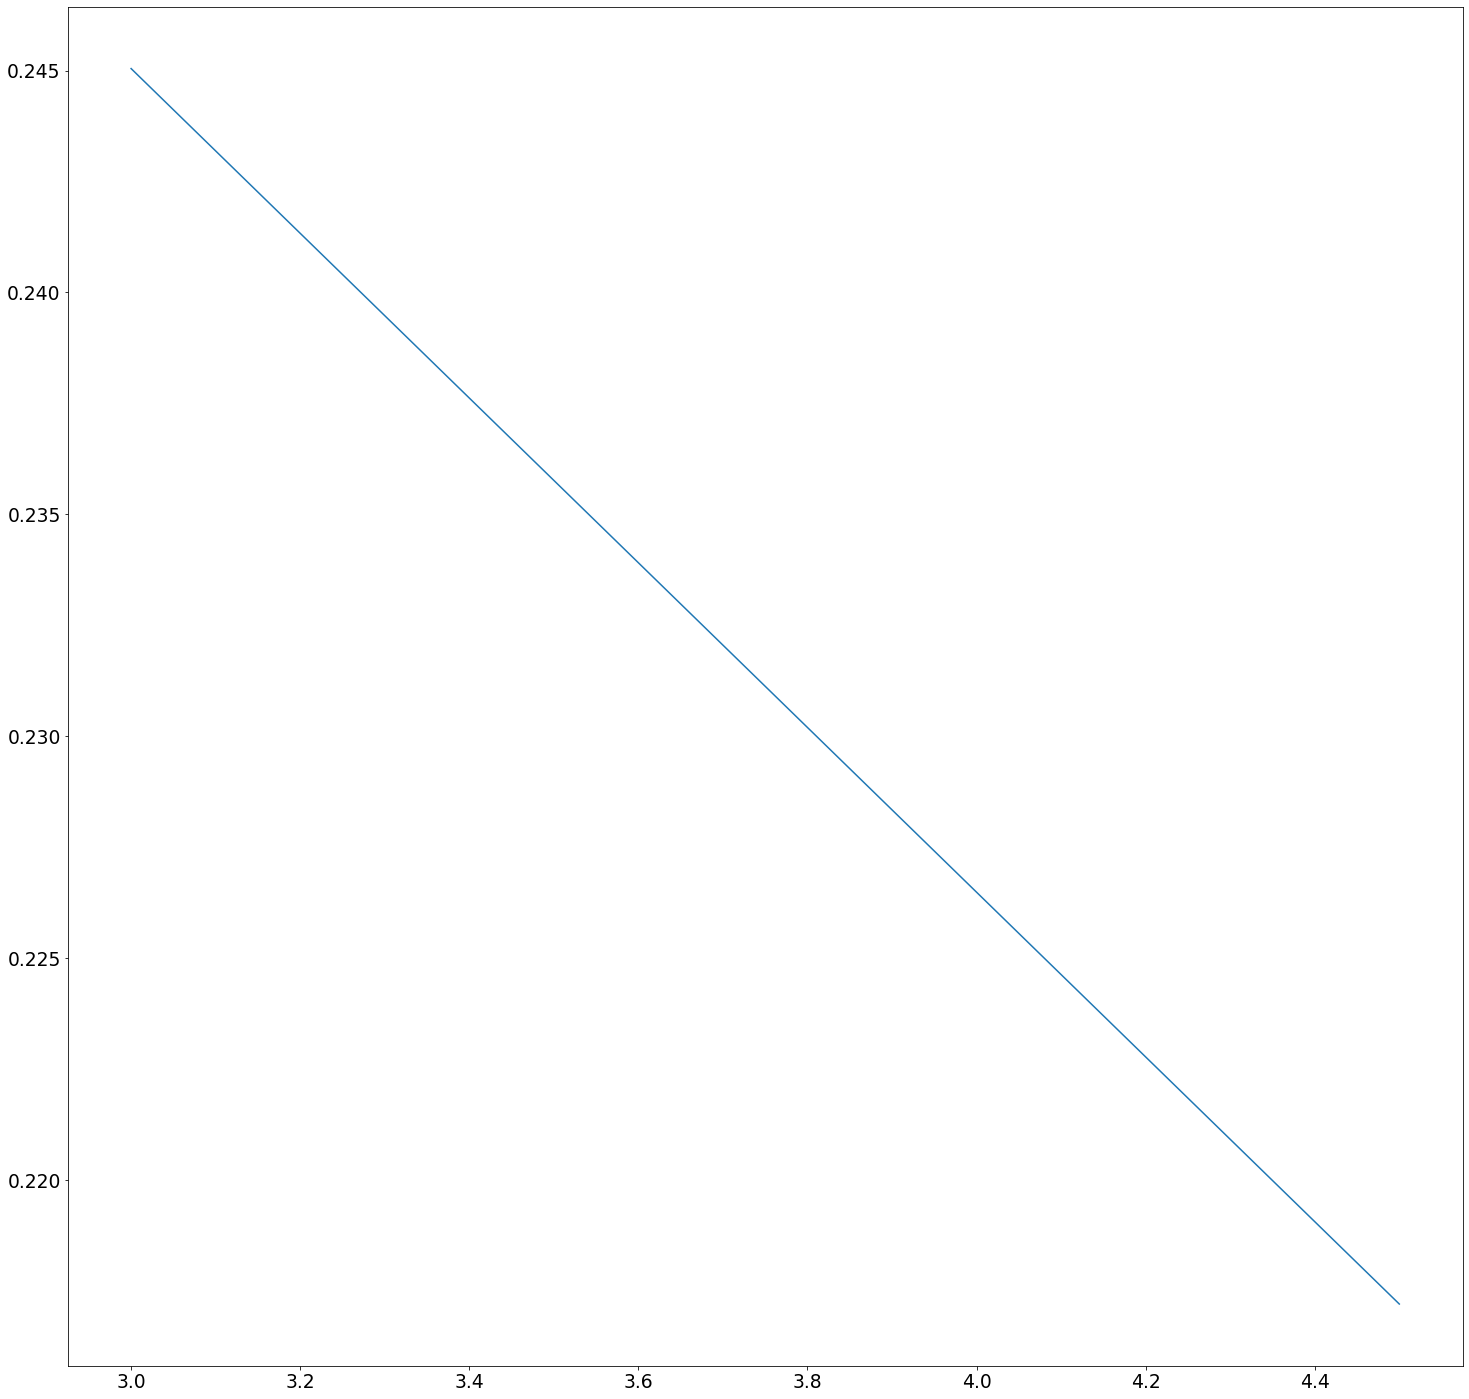

In [23]:
plt.figure()
ax=plt.gca()
ax.plot(Q_SLP[1:],Q_res)
